## Importing Dataset & Checking for missing values ##

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:

df = pd.read_csv("Churn_Modelling.csv") 
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:

df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Shape of dataset: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Ag

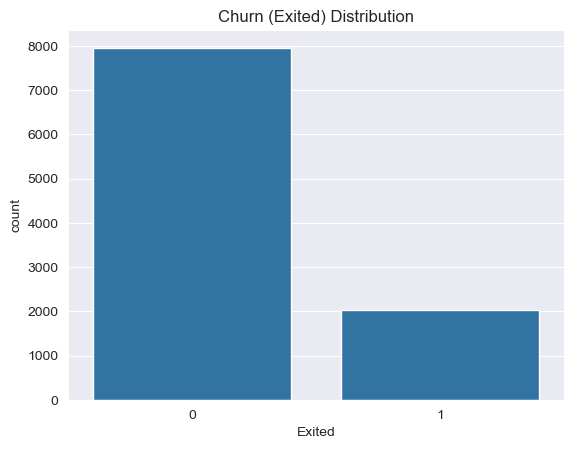

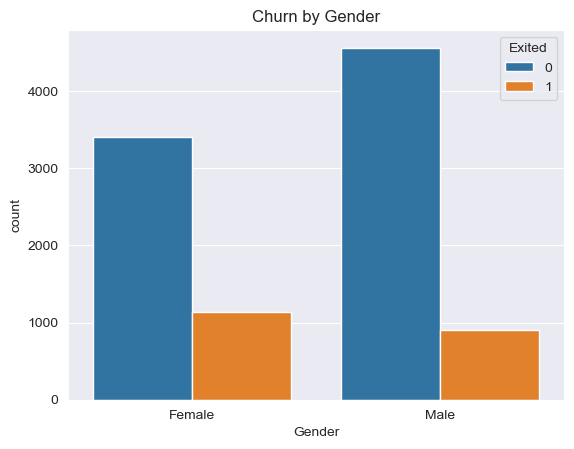

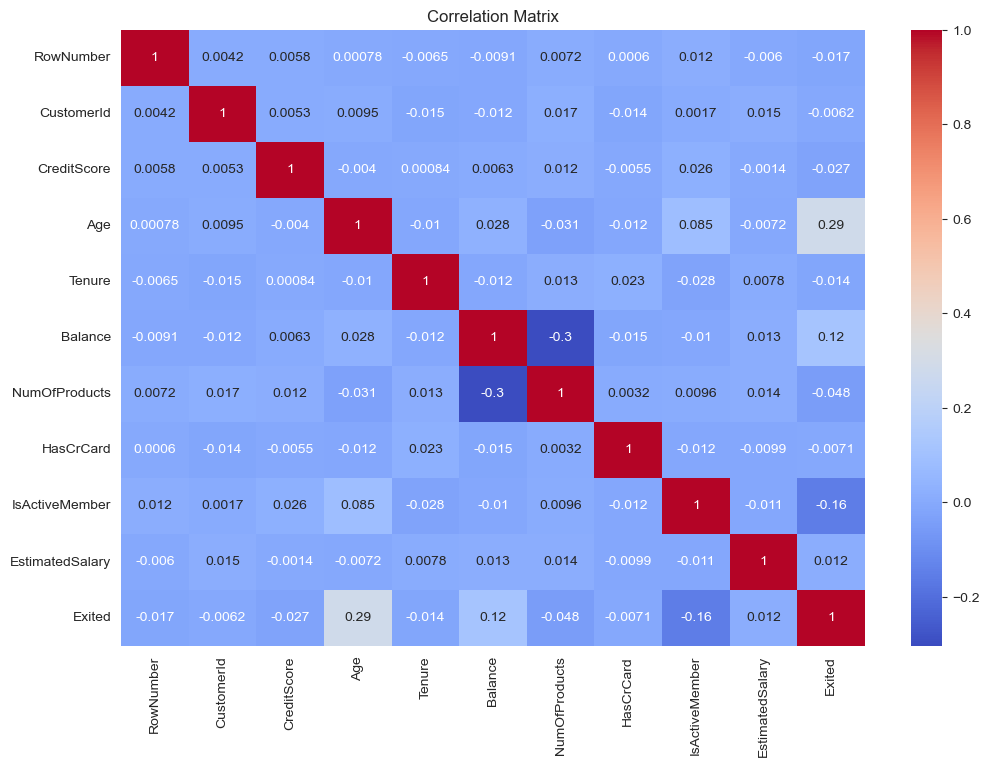

In [5]:
print("Shape of dataset:", df.shape)
print(df.info())
print(df.describe())



sns.countplot(x='Exited', data=df)
plt.title('Churn (Exited) Distribution')
plt.show()


sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

# Correlation matrix 
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Dropping the Non-informative columns & one hot encoding of Geography and Gender ## 


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname','HasCrCard'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

print(df.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0          619   42       2       0.00              1               1   
1          608   41       1   83807.86              1               1   
2          502   42       8  159660.80              3               0   
3          699   39       1       0.00              2               0   
4          850   43       2  125510.82              1               1   

   EstimatedSalary  Exited  Geography_Germany  Geography_Spain  Gender_Male  
0        101348.88       1              False            False        False  
1        112542.58       0              False             True        False  
2        113931.57       1              False            False        False  
3         93826.63       0              False            False        False  
4         79084.10       0              False             True        False  


## Dropping the Exited details & Splitting the dataset ##


In [7]:
X = df.drop('Exited', axis=1)
y = df['Exited']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (8000, 10)
Test shape: (2000, 10)


## Scaling ##

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


# MODELS #

## DECISION TREES ##

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000



## RANDOM FOREST ##

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## SVM ##

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results:\n", classification_report(y_test, y_pred_svm))


SVM Results:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



## XG BOOST ##

In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



/opt/anaconda3/envs/testenvi/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## ANN ##

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()
ann.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


2025-04-21 16:42:55.062524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7811 - val_loss: 0.4369 - val_accuracy: 0.8180
Epoch 2/50
250/250 [==============================] - 0s 960us/step - loss: 0.4254 - accuracy: 0.8205 - val_loss: 0.4021 - val_accuracy: 0.8340
Epoch 3/50
250/250 [==============================] - 0s 948us/step - loss: 0.3993 - accuracy: 0.8360 - val_loss: 0.3809 - val_accuracy: 0.8460
Epoch 4/50
250/250 [==============================] - 0s 939us/step - loss: 0.3807 - accuracy: 0.8425 - val_loss: 0.3677 - val_accuracy: 0.8500
Epoch 5/50
250/250 [==============================] - 0s 942us/step - loss: 0.3673 - accuracy: 0.8486 - val_loss: 0.3582 - val_accuracy: 0.8510
Epoch 6/50
250/250 [==============================] - 0s 977us/step - loss: 0.3593 - accuracy: 0.8511 - val_loss: 0.3509 - val_accuracy: 0.8530
Epoch 7/50
250/250 [==============================] - 0s 966us/step - loss: 0.3531 - accuracy: 0.8544 - val_loss: 0.3482 - val_accuracy: 0

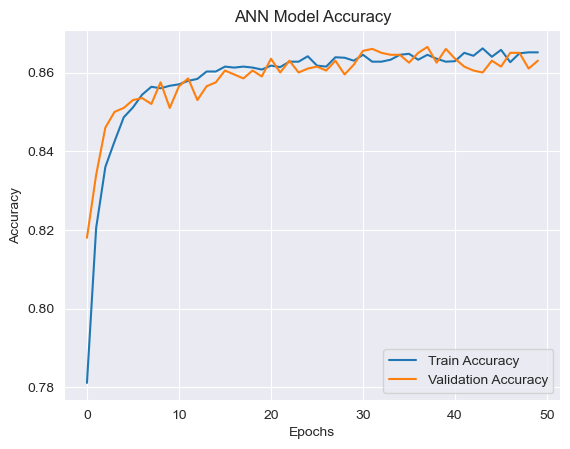

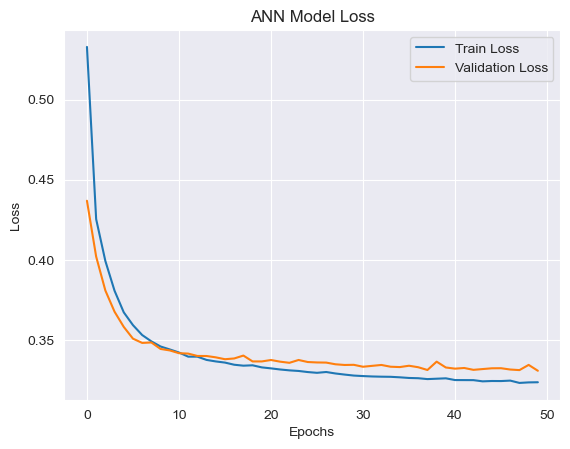

In [18]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## CAT BOOST ##

In [38]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)


y_pred_cat = cat.predict(X_test)


print("CatBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("F1 Score:\n", classification_report(y_test, y_pred_cat, zero_division=0))


CatBoost Classifier
Accuracy: 0.8655
F1 Score:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



# SCORES ##

In [19]:
from sklearn.metrics import accuracy_score, classification_report


models = {
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
 
}

for name, y_pred in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", classification_report(y_test, y_pred, zero_division=0))



Decision Tree
Accuracy: 0.787
F1 Score:               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000


Random Forest
Accuracy: 0.8635
F1 Score:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [20]:
   
models = {
    
    'XGBoost': y_pred_xgb,
    'SVM': y_pred_svm,
}

for name, y_pred in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", classification_report(y_test, y_pred, zero_division=0))




XGBoost
Accuracy: 0.86
F1 Score:               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000


SVM
Accuracy: 0.86
F1 Score:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [21]:
models = {

  'ANN': (ann.predict(X_test) > 0.5).astype(int).flatten()
}

for name, y_pred in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", classification_report(y_test, y_pred, zero_division=0))



63/63 [==============================] - 0s 1ms/step

ANN
Accuracy: 0.863
F1 Score:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# Applying SMOTE : Addressing Class Imbalance & GridSearchCV : Hyperparameter Tuning #

In [22]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Decision Trees ( SMOTE and GridSearchCV ) ##

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': 20, 'min_samples_split': 2}


In [25]:
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", classification_report(y_test, y_pred))


Accuracy: 0.771
F1 Score:               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1607
           1       0.44      0.57      0.49       393

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.80      0.77      0.78      2000



## RandomForest ( SMOTE and GridSearchCV ) ##

In [26]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid_search_rf.best_params_)


Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [28]:
y_pred_rf = grid_search_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.838
Random Forest F1 Score:               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## XGB ( SMOTE and GridSearchCV ) ##

In [29]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200]}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid_search_xgb.best_params_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [31]:
y_pred_xgb = grid_search_xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.854
XGBoost F1 Score:               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.65      0.56      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



## SVM ( SMOTE and GridSearchCV ) ##

In [32]:
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)


SVC(class_weight='balanced')

In [33]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 'scale']}
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)
print("Best Parameters:", grid_search_svm.best_params_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [34]:
y_pred_svm = grid_search_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.861
SVM F1 Score:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## ANN ##

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.8151 - val_loss: 0.3728 - val_accuracy: 0.8425
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8449 - val_loss: 0.3491 - val_accuracy: 0.8525
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8515 - val_loss: 0.3431 - val_accuracy: 0.8580
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8530 - val_loss: 0.3400 - val_accuracy: 0.8590
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8591 - val_loss: 0.3413 - val_accuracy: 0.8600
Epoch 6/50
250/250 [==============================] - 0s 996us/step - loss: 0.3410 - accuracy: 0.8594 - val_loss: 0.3367 - val_accuracy: 0.8630
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8568 - val_loss: 0.3372 - val_accuracy: 0.8615
Epoc

In [36]:
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5) 
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN F1 Score:", classification_report(y_test, y_pred_ann))


63/63 [==============================] - 0s 556us/step
ANN Accuracy: 0.862
ANN F1 Score:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## CatBoost ##

In [44]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train_resampled, y_train_resampled)


y_pred_cat = cat.predict(X_test)


print("CatBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("F1 Score:\n", classification_report(y_test, y_pred_cat, zero_division=0))

CatBoost Classifier
Accuracy: 0.8665
F1 Score:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1607
           1       0.69      0.58      0.63       393

    accuracy                           0.87      2000
   macro avg       0.80      0.76      0.77      2000
weighted avg       0.86      0.87      0.86      2000



# SCORES of all MODELS with SMOTE & without SMOTE #

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test, use_smote=False, model_name=""):
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    if model_name == "ANN":
        # Scale for ANN
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        ann = Sequential()
        ann.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
        ann.add(Dense(64, activation='relu'))
        ann.add(Dense(1, activation='sigmoid'))
        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        ann.fit(X_train, y_train, epochs=20, verbose=0, batch_size=32)

        y_pred = (ann.predict(X_test) > 0.5).astype(int).reshape(-1)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    return acc, prec


In [47]:
from sklearn.metrics import accuracy_score, precision_score

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier( eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "ANN": None  # We'll handle ANN separately
    
}

results = []

for model_name, model in models.items():
    if model_name != "ANN":
        acc1, prec1 = evaluate_model(model, X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy(), use_smote=False, model_name=model_name)
        acc2, prec2 = evaluate_model(model, X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy(), use_smote=True, model_name=model_name)
    else:
        acc1, prec1 = evaluate_model(None, X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy(), use_smote=False, model_name="ANN")
        acc2, prec2 = evaluate_model(None, X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy(), use_smote=True, model_name="ANN")

    results.append([model_name, acc1, prec1, acc2, prec2])


63/63 [==============================] - 0s 1ms/step


In [49]:
df = pd.DataFrame(results, columns=["Model", "Accuracy (No SMOTE)", "Precision (No SMOTE)", "Accuracy (SMOTE)", "Precision (SMOTE)"])
print(df)


           Model  Accuracy (No SMOTE)  Precision (No SMOTE)  Accuracy (SMOTE)  \
0  Decision Tree               0.7870              0.461358            0.7690   
1  Random Forest               0.8635              0.734375            0.8380   
2        XGBoost               0.8600              0.696864            0.8535   
3            SVM               0.8600              0.775610            0.7865   
4       CatBoost               0.8655              0.727941            0.8665   
5            ANN               0.8575              0.688811            0.8090   

   Precision (SMOTE)  
0           0.432485  
1           0.584352  
2           0.639665  
3           0.472492  
4           0.690909  
5           0.510978  


# Feature Importance Analysis #

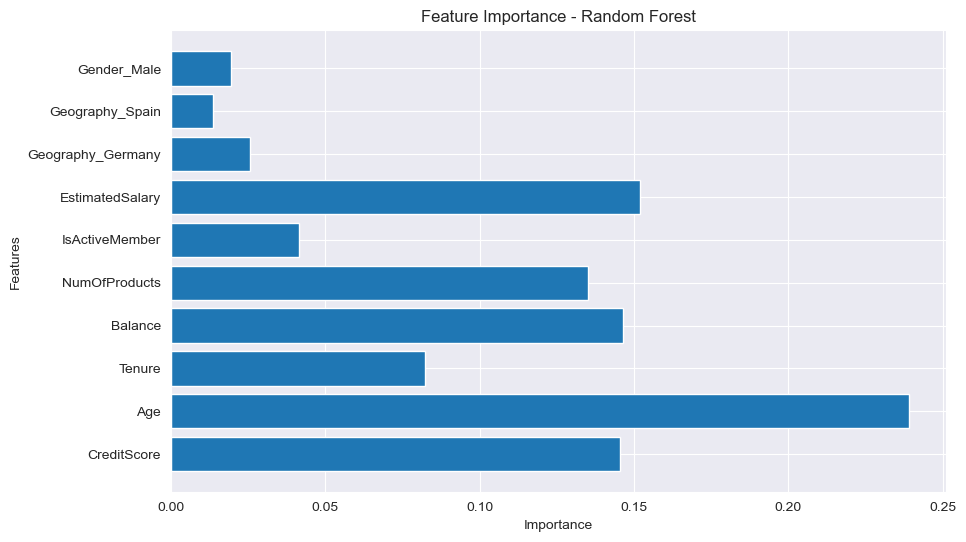

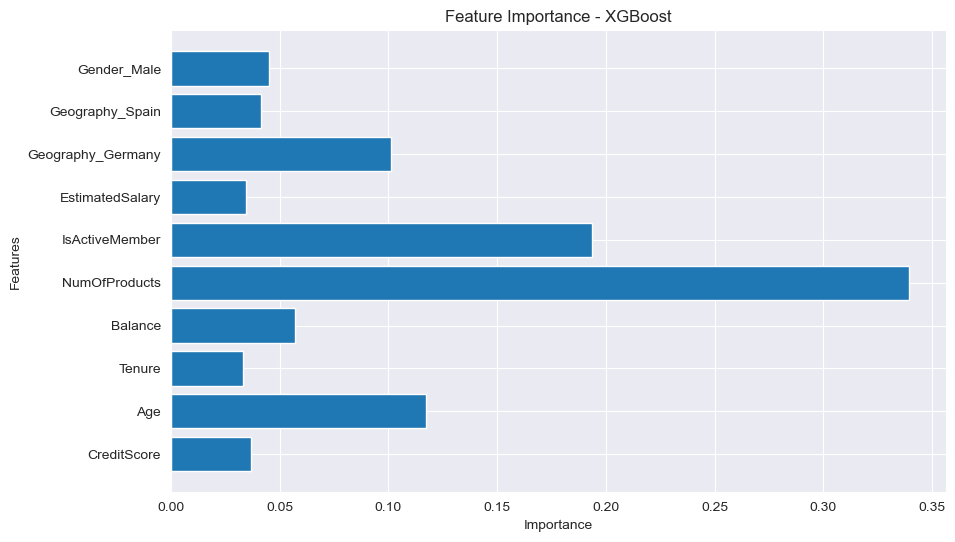

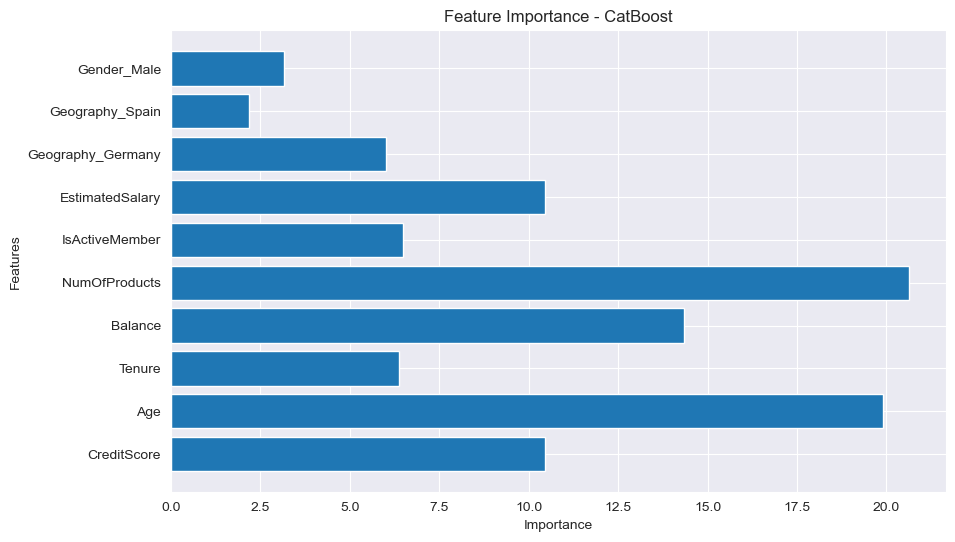

In [54]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances_rf = rf_model.feature_importances_


xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
importances_xgb = xgb_model.feature_importances_

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
importances_cat = cat_model.get_feature_importance()


plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances_rf)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances_xgb)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances_cat)
plt.title('Feature Importance - CatBoost')
plt.xlabel('Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


**Top features influencing churn include: NumOfProducts, Age, Balance, IsActiveMember, etc. as seen in feature importance plots. These insights can help businesses focus retention efforts more effectively.**